In [115]:
import re

In [116]:
logFilePath = './日志/transformedPoints.txt'

In [117]:
class Point:
    def __init__(self, lat=0, lon=0, alt=0):
        self.lat = lat
        self.lon = lon
        self.alt = alt

In [118]:
points1 = []
points2 = []
points3 = []

with open(logFilePath) as f:
    pat = re.compile(r'[0-9]+(?:\.[0-9]+)?')
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if 'lat' in s:
                l = pat.findall(s)
                try:
                    lat, lon, alt, num = l
                except ValueError:
                    print(s)
                    print(l)
                    raise ValueError()
                if float(lat) > 1:
                    points1.append(l)
                if l[2] == '32':
                     points1.append(l)
                elif l[2] == '64':
                     points2.append(l)
                elif l[2] == '87':
                     points3.append(l)
                print(l)
                print(l[0],',', l[1])
# print(len(points))

In [119]:
# ys = []
# xs = []
# with open(logFilePath) as f:
#     while True:
#         s = f.readline()
#         if not s:
#             break
#         else:
#             if s[0] == 'l':
#                 index = s.index('a')
#                 xs.append(float(s[index+4:index+16]))
#                 index = s.index('o')
#                 ys.append(float(s[index+4:index+16]))
# print(xs)
# print(ys)
#
        
    

In [120]:
# stableXs = []
# stableYs = []
# with open(logFilePath) as f:
#     while True:
#         s = f.readline()
#         if not s:
#             break
#         else:
#             if s[0] == '坐':
#                 stableXs.append(float(s[8:26]))
#                 stableYs.append(float(s[-12:]))
# print(stableXs)
# print(stableYs)

In [121]:
# import math
# import numpy as np
# points = [(xs[i], ys[i]) for i in range(len(xs))]
#
# def distance(a, b):
#     return math.sqrt((a[1] - b[1])**2 + (a[0] - b[0])**2)
#
# def mean(points, length):
#     x = y = 0
#     for i in range(length):
#         x += points[i][0]
#         y += points[i][1]
#     return x/length, y/length
#
# def center(points, iteration=1000):
#     """
#         points (list of tuples)
#     """
#     if not points: return None
#     old_center = points[0]
#     length = math.ceil(len(points)*2/3)
#     while iteration > 0:
#         iteration -= 1
#         points.sort(key=lambda p: distance(p, old_center))
#         new_center = mean(points, length)
#         if old_center == new_center:
#             return new_center
#         old_center = new_center
#
# center(points)

In [122]:
x=y=0
x+=1
x,y

(1, 0)

[]
[]
[]
[]
[]
[]


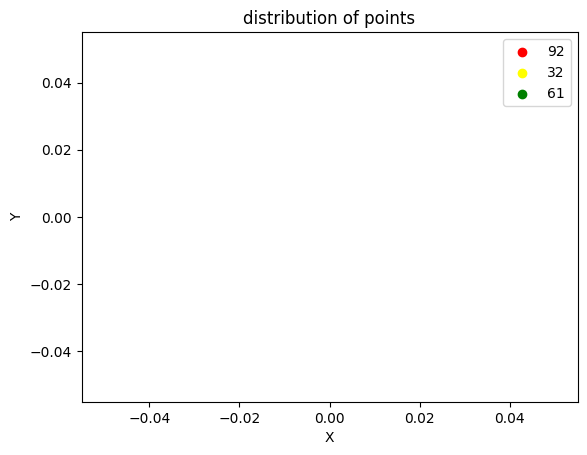

In [123]:
import matplotlib.pyplot as plt

xs1 = [float(t[0]) for t in points1]
xs2 = [float(t[0]) for t in points2]
xs3 = [float(t[0]) for t in points3]
print(xs1)
print(xs2)
print(xs3)
ys1 = [float(t[1]) for t in points1]
ys2 = [float(t[1]) for t in points2]
ys3 = [float(t[1]) for t in points3]
print(ys1)
print(ys2)
print(ys3)
# 创建一个新的图形
# plt.figure()

# 绘制点
plt.scatter(xs1, ys1, color='red', label='92') # , label='point')
plt.scatter(xs2, ys2, color='yellow', label='32')
plt.scatter(xs3, ys3, color='green', label='61')

# plt.scatter(38.5429065, 115.04156569999999, color='blue', label='real 32')
# plt.scatter(38.5427286, 115.04163059999999, color='purple', label='real 92')
# plt.scatter(38.5429856, 115.0418167, color='cyan', label='real 61')

# plt.scatter(stableXs, stableYs, label='stable_point', color='yellow')
# plt.scatter(*mean(points, len(points)), label='center_of_all_points', color='green')
# plt.scatter(*center(points), label='center_point_i_find_somehow', color='red')

# 设置图形的标题和坐标轴标签
plt.title('distribution of points')
plt.xlabel('X')
plt.ylabel('Y')
#
# # 添加图例
plt.legend()

# # 设置X轴和Y轴的刻度范围
# plt.xlim(22.59195 - 0.0001, 22.59195 + 0.0001)
# plt.ylim(113.9621 - 0.0001, 113.9621 + 0.0001)

# 显示图形
plt.show()